# Softened Isothermal Sphere

A way to introduce a core into a profile is by modifying its surface density profile:
$$
\Sigma(\xi)=\frac{\sigma_v^2}{2G}\frac{1}{\sqrt{\xi^2+\xi_c^2}}=\frac{\Sigma_0}{\sqrt{1+\xi^2/\xi_c^2}}
$$

If we choose $\xi_0=4\pi\sigma_v^2/c^2D_LD_{LS}/D_S$ (the Einstein radius of the SIS), then
$$
\kappa(x)=\frac{1}{\sqrt{x^2+x_c^2}}
$$

It follows that:
$$
m(x)=2\int_0^x \kappa(x')x'dx'=\sqrt{x^2+x_c^2}-x_c
$$

$$
\alpha(x)=\frac{m(x)}{x}=\sqrt{1+\frac{x_c^2}{x^2}}-\frac{x_c}{x}
$$

$$
\gamma(x)=\frac{m(x)}{x^2}-\kappa(x)
$$

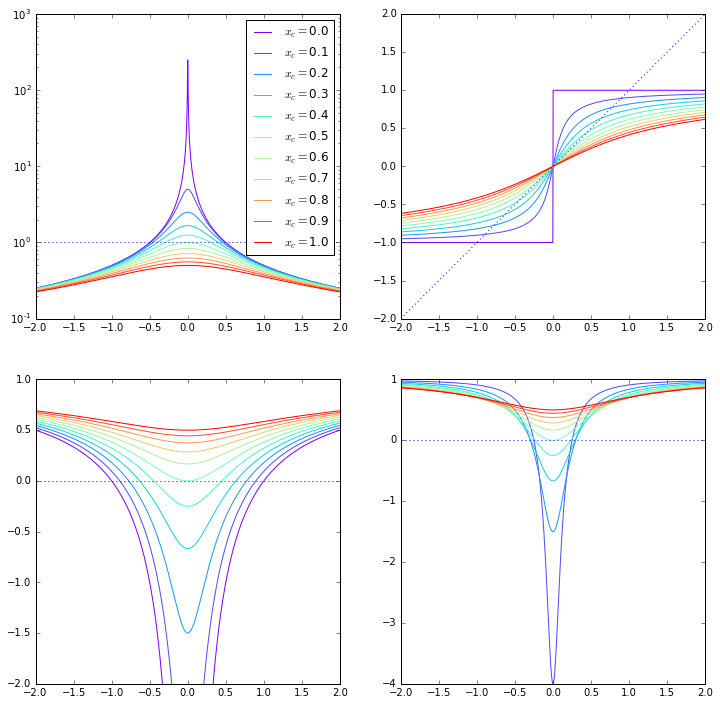

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm 

def kappa(x,xc):
    return (1.0/2.0/np.sqrt(x**2+xc**2))

def mass(x,xc):
    return np.sqrt(x**2+xc**2)-xc

def alpha(x,xc):
    return mass(x,xc)/x

def gamma(x,xc):
    #return (mass(x,xc)/x**2-kappa(x,xc))
    return (x**2+2.0*xc**2-2.0*xc*np.sqrt(x**2+xc**2))/2.0/x**2/np.sqrt(x**2+xc**2)

def lambdat(x,xc):
    return 1.0-mass(x,xc)/x**2

def lambdar(x,xc):
    return 1.0-kappa(x,xc)+gamma(x,xc)

xc=np.linspace(0.0,1.0,11)
color=iter(cm.rainbow(np.linspace(0,1,xc.size)))


x=np.linspace(-2.0,2.0,1000)

fig,ax=plt.subplots(2,2,figsize=(12,12))

for i in range(xc.size):
    c=next(color)
    ka=kappa(x,xc[i])
    ga=gamma(x,xc[i])
    a=alpha(x,xc[i])
    lt=lambdat(x,xc[i])
    lr=lambdar(x,xc[i])
    ax[0,0].plot(x,ka,'-',color=c,label=r'$x_c=$'+str(xc[i]))
    ax[0,1].plot(x,a,'-',color=c)
    #ax[1,0].plot(x,ga,'-',color=c)
    ax[1,0].plot(x,lt,'-',color=c)
    ax[1,1].plot(x,lr,'-',color=c)
        
ax[0,0].legend(loc='best')
ax[0,0].set_yscale('log')
ax[1,0].set_ylim([-2,1])
ax[0,0].plot([-2,2],[1,1],':')
ax[0,1].plot([-2,2],[-2,2],':')
ax[1,1].plot([-2,2],[0,0],':')
ax[1,0].plot([-2,2],[0,0],':')

# Critical lines and caustics

Both radial and tangential critical lines exist for $x_c<1/2$. 
The tangential critical line is found by setting
$$
y/x=1-\frac{m(x)}{x^2}=0
$$
which leads to 
$$
x_t=\sqrt{1-2x_c}
$$

The radial critical line is found by solving
$$
\frac{dy}{dx}=1-\frac{d\alpha}{dx}=0 \;.
$$
This condition gives
$$
x_r^2=\frac{1}{2}\left(2x_c-x_c^2-x_c\sqrt{x_c^2+4x_c}\right)
$$

The tangential caustic is a point at $y_t=0$, as for all circular lenses. The radial caustic can be found by inserting $x_r$ into the lens equation:
$$
y_r=x_r-\alpha(x_r) \;.
$$

/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


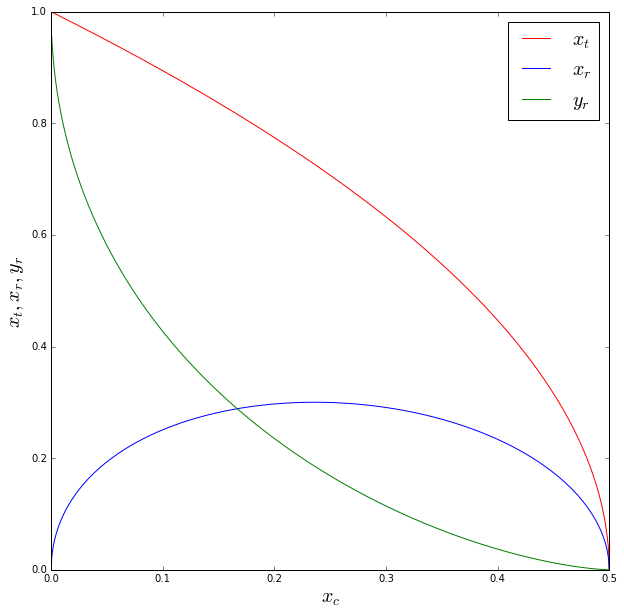

In [2]:
# critical lines and caustics

def xtan(xc):
    return (np.sqrt(1.0-2*xc))

def xrad(xc):
    return (np.sqrt(0.5*(2*xc-xc**2-xc*np.sqrt(xc**2+4*xc))))

def yrad(xc):
    return -(xrad(xc)-alpha(xrad(xc),xc))

fig,ax=plt.subplots(1,1,figsize=(10,10))

xc=np.linspace(0.0,0.5,1000)
xr=xrad(xc)
#print lambdar(xr,xc)
yr=yrad(xc)
xt=xtan(xc)
ax.plot(xc,xt,'-',color='red',label=r'$x_t$')
ax.plot(xc,xr,'-',color='blue',label=r'$x_r$')
ax.plot(xc,yr,'-',color='green',label=r'$y_r$')
ax.set_xlabel(r'$x_c$',fontsize=20)
ax.set_ylabel(r'$x_t,x_r,y_r$',fontsize=20)
ax.legend(loc='best',fontsize=20)

# Multiple images

The softened isothermal sphere (also known as NIS=Non-singular Isothermal Sphere) is a centrally concentrated lens with $\kappa<\kappa_{max}$.

The condition for the lens to be able to produce multiple images is that  $\kappa(0)\geq1$, or $x_c\leq 1/2$.

To find the location of the images of a source at $y$, we need to solve the lens equation. This can be reduced to the form
$$
x^3-2yx^2+(y^2+2x_c-1)x-2yx_c=0
$$
which can be solved numerically.

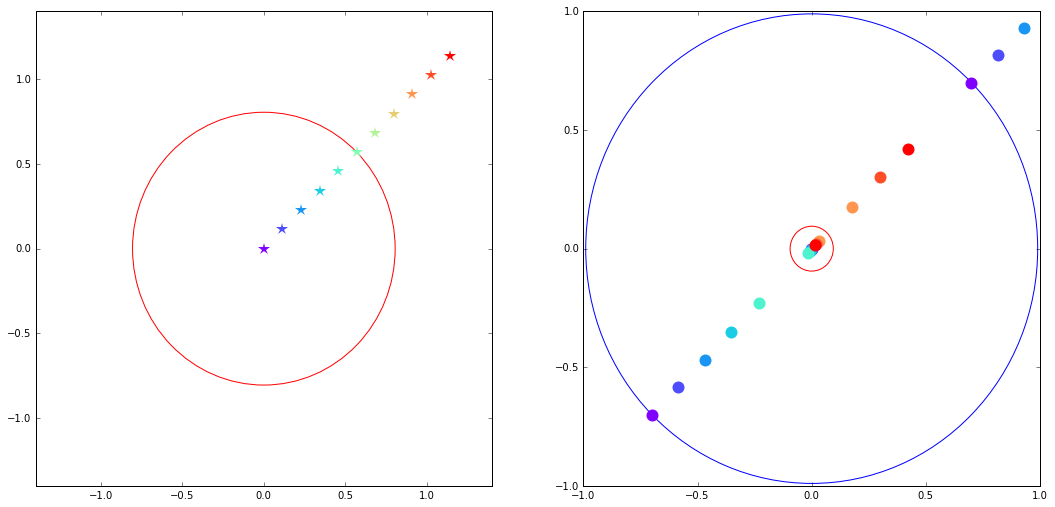

In [7]:
def lenseq(x,y,xc):
    return (x**3-2*y*x**2+(y**2+2*xc-1)*x-2*y*xc)

def images(y,xc):
    coefficients = [1,-2*y,y**2+2*xc-1,-2.0*y*xc]
    z=np.roots(coefficients)
    return z

xc=0.01
y=np.linspace(0.0,2.0*yrad(xc),11)

color=iter(cm.rainbow(np.linspace(0,1,y.size)))

fig,ax=plt.subplots(1,2,figsize=(18,8.5))

circle_out=plt.Circle((0,0),yrad(xc),color='red',fc='blue',fill=False)

ax[0].add_artist(circle_out)
ax[0].plot([0.0],[0.0],'.',color='blue')

circle_out=plt.Circle((0,0),xtan(xc),color='blue',fill=False)
circle_in=plt.Circle((0,0),xrad(xc),color='red',fill=False)
ax[1].add_artist(circle_in)
ax[1].add_artist(circle_out)



ax[0].set_xlim([-1.4,1.4])
ax[0].set_ylim([-1.4,1.4])
ax[1].set_xlim([-1.0,1.0])
ax[1].set_ylim([-1.0,1.0])

for j in range(y.size):
    c=next(color)
    im=images(y[j],xc)
    y1=y[j]*np.cos(np.pi/4)
    y2=y[j]*np.sin(np.pi/4)
    ax[0].plot([y1],[y2],'*',color=c,markeredgecolor='none',markersize=12)
    ima=[]
    for i in range(im.size):
        if (im[i].imag == 0):
            ima.append(im[i].real)
    
    x1=np.array(ima)*np.cos(np.pi/4)
    x2=np.array(ima)*np.sin(np.pi/4)

    ax[1].plot(x1,x2,'o',color=c,markeredgecolor='none',markersize=12)

We can now see how the separation between the images depends on the core radius.

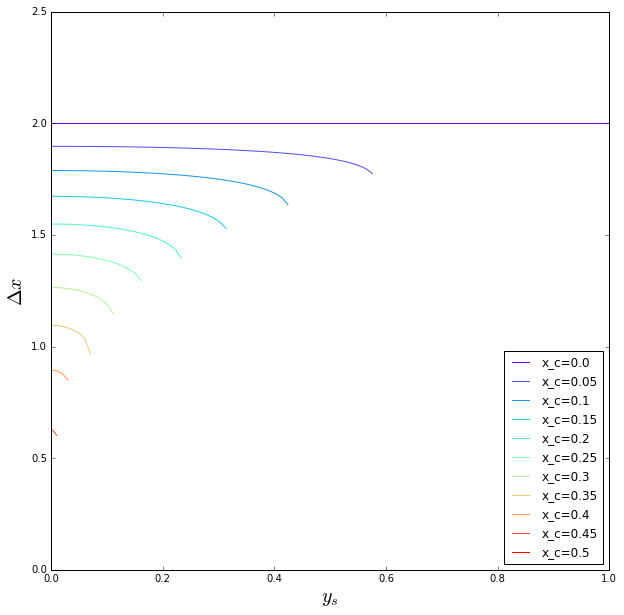

In [6]:
xc=np.linspace(0.0,0.5,11)
y=np.linspace(0.0,1.0,100)

color=iter(cm.rainbow(np.linspace(0,1,xc.size)))

fig,ax=plt.subplots(1,1,figsize=(10,10))

for k in range(xc.size):
    c=next(color)
    deltax=[]
    yx=[]
    for j in range(y.size):
        im=images(y[j],xc[k])
        ima=[]
        for i in range(im.size):
            if (im[i].imag == 0):
                ima.append(im[i].real)
        if (len(ima)>1):
            deltax.append(np.amax(np.array(ima))-np.amin(np.array(ima)))
            yx.append(y[j])
    ax.plot(yx,deltax,'-',color=c,label=r'x_c='+str(xc[k]))
ax.legend(loc='best')
ax.set_xlabel(r'$y_s$',fontsize=20)
ax.set_ylabel(r'$\Delta x$',fontsize=20)

Note that multiple images exist as long as $y_s<y_r$. The larger the size of core, the smaller the size of the radial caustic. Of course, the limit for a vanishing core is the SIS. As $y_s\rightarrow y_r(x_c)$, $\Delta x$ becomes a decreasing function of $y_s$, deviating from the SIS behavior

# Alternative approach to create cored lens profiles

A core can be introduced also in the lens potential. Let us consider the again the SIS lens. If we introduce a core in the potential, we obtain:
$$
\psi(x)=|x| \rightarrow \psi(x)=\sqrt{x^2+x_{c,\psi}^2}
$$

It follows that:
$$
\alpha_\psi(x)=\frac{x}{\sqrt{x^2+x_{c,\psi}^2}}
$$

$$
m_\psi(x)=\frac{x^2}{\sqrt{x^2+x_{c,\psi}^2}}
$$

$$
\kappa_\psi(x)=\frac{1}{2x}\frac{dm_\psi}{dx}=\frac{x^2+2x_{c,\psi}^2}{2(x^2+x_{c,\psi}^2)^{3/2}}
$$

$$
\gamma_\psi(x)=\frac{m(x)}{x^2}-\kappa(x)=\frac{x^2}{2(x^2+x_{c,\psi}^2)^{3/2}}
$$

Note that 
$$
\kappa_\psi(0)=\frac{1}{x_{c,\psi}}
$$
while
$$
\kappa(0)=\frac{1}{2x_c}
$$

for the NIS. Therefore, if we want to directly compare the SIS and the NIS, we have to choose $x_{c,\psi}=2x_c$.

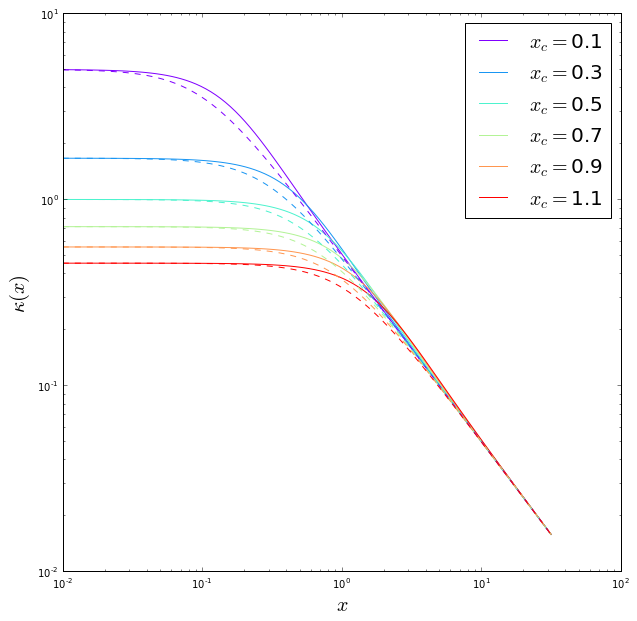

In [7]:
def kappa(x,xc):
    return (x**2+2*(2.0*xc)**2)/2/(x**2+(2.0*xc)**2)**1.5

x=np.logspace(-2,1.5,100)
xc=np.linspace(0.1,1.1,6)

color=iter(cm.rainbow(np.linspace(0,1,xc.size)))

fig,ax=plt.subplots(1,1,figsize=(10,10))

for i in range(xc.size):
    c=next(color)
    k=kappa(x,xc[i])
    ax.plot(x,k,'-',color=c,label=r'$x_c=$'+str(xc[i]))
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc='best',fontsize=20)
ax.set_ylabel(r'$\kappa(x)$',fontsize=20)
ax.set_xlabel(r'$x$',fontsize=20)

def kappa_sigma(x,xc):
    return 1.0/2.0/(x**2+xc**2)**0.5

color=iter(cm.rainbow(np.linspace(0,1,xc.size)))
for i in range(xc.size):
    c=next(color)
    k=kappa_sigma(x,xc[i])
    ax.plot(x,k,'--',color=c,label=r'$x_c=$'+str(xc[i]))

The plot above shows the convergence profiles of the NIS (dashed lines) and of the NIS$_\psi$ model (solid line) for several values of $x_c$. By construction (and accounting for the different definitions of core radii) the profiles have the same central convergences. At large radii, they follow the same power law, $\kappa \propto x^{-1}$. Differences between the profiles arise around the core radius. The NIS profiles have a softer change of slope compared to the NIS$_\psi$ profiles.

In the plots below, several properties of the two models are compared.

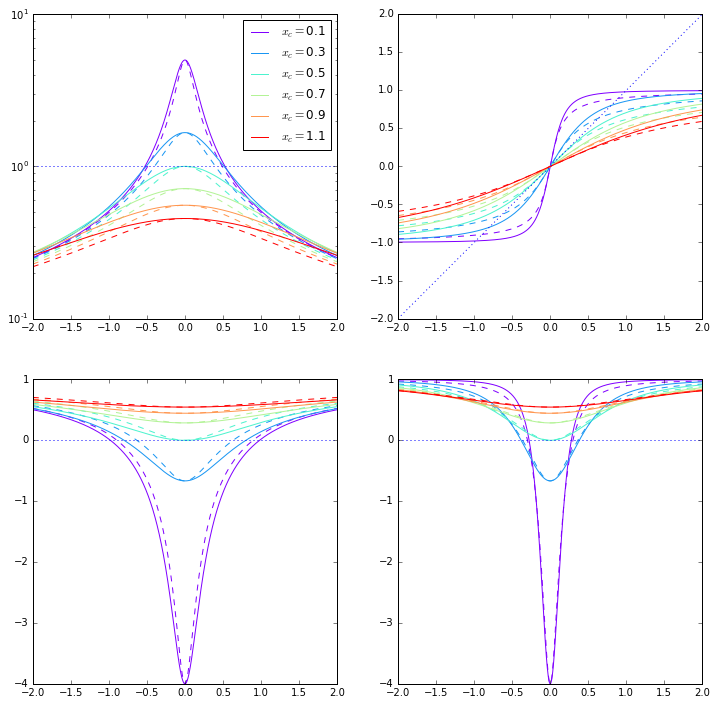

In [8]:
def kappa_psi(x,xc):
    return (x**2+2*xc**2)/2/(x**2+xc**2)**1.5

def mass_psi(x,xc):
    return x**2/np.sqrt(x**2+xc**2)

def alpha_psi(x,xc):
    return mass_psi(x,xc)/x

def gamma_psi(x,xc):
    return (mass_psi(x,xc)/x**2-kappa_psi(x,xc))

def lambdat_psi(x,xc):
    return 1.0-mass_psi(x,xc)/x**2

def lambdar_psi(x,xc):
    return 1.0-kappa_psi(x,xc)+gamma_psi(x,xc)

color=iter(cm.rainbow(np.linspace(0,1,xc.size)))

x=np.linspace(-2.0,2.0,1000)

fig,ax=plt.subplots(2,2,figsize=(12,12))

for i in range(xc.size):
    c=next(color)
    ka=kappa_psi(x,xc[i]*2.)
    ga=gamma_psi(x,xc[i]*2.)
    a=alpha_psi(x,xc[i]*2.)
    lt=lambdat_psi(x,xc[i]*2.)
    lr=lambdar_psi(x,xc[i]*2.)
    ka_=kappa_sigma(x,xc[i])
    ga_=gamma(x,xc[i])
    a_=alpha(x,xc[i])
    lt_=lambdat(x,xc[i])
    lr_=lambdar(x,xc[i])
    ax[0,0].plot(x,ka,'-',color=c,label=r'$x_c=$'+str(xc[i]))
    ax[0,1].plot(x,a,'-',color=c)
    ax[1,0].plot(x,lt,'-',color=c)
    #ax[1,1].plot(x,lt,'-',color=c)
    ax[1,1].plot(x,lr,'-',color=c)
    ax[0,0].plot(x,ka_,'--',color=c)
    ax[0,1].plot(x,a_,'--',color=c)
    ax[1,0].plot(x,lt_,'--',color=c)
    #ax[1,1].plot(x,lt,'-',color=c)
    ax[1,1].plot(x,lr_,'--',color=c)

ax[0,0].set_yscale('log')
ax[0,0].legend(loc='best')
ax[0,0].plot([-2,2],[1,1],':')
ax[0,1].plot([-2,2],[-2,2],':')
ax[1,1].plot([-2,2],[0,0],':')
ax[1,0].plot([-2,2],[0,0],':')

# Time delays for the NIS

To calculate the time delays for the NIS, we need an expression for the lensing potential. This can again be found by solving the Poisson equation
$$
\triangle \psi=2\kappa
$$

which leads to
$$
\psi(x,x_c)=\sqrt{x^2+x_c^2}-x_c\ln{\left(x_c+\sqrt{x^2+x_c^2}\right)}
$$

Then, the travel time is 
$$
t(x,x_c)\propto \frac{1}{2}(x-y)^2-\psi(x,x_c)
$$

(-0.05, 1.5)

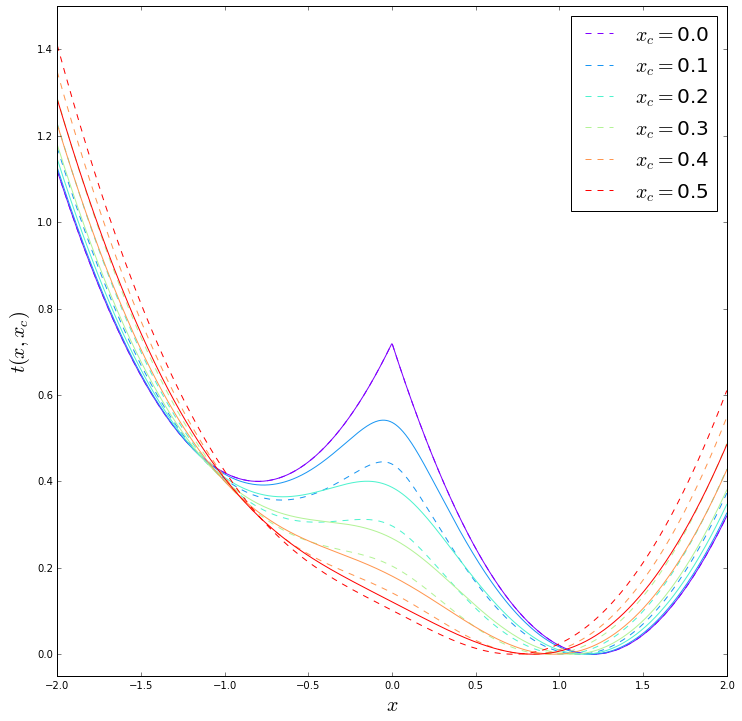

In [11]:
def pot_nis(x,xc):
    return np.sqrt(x**2+xc**2)-xc*np.log(xc+np.sqrt(x**2+xc**2))

def pot_nis_pot(x,xc):
    return np.sqrt(x**2+xc**2)

def travel_time(y,x,xc):
    return 0.5*(x-y)**2-pot_nis(x,xc)

def travel_time_pot(y,x,xc):
    return 0.5*(x-y)**2-pot_nis_pot(x,xc)

x=np.linspace(-2.0,2.0)
xc=np.linspace(0.0,0.5,6)

color=iter(cm.rainbow(np.linspace(0,1,xc.size)))

x=np.linspace(-2.0,2.0,1000)

fig,ax=plt.subplots(1,1,figsize=(12,12))

y=0.2
for i in range(xc.size):
    c=next(color)
    ax.plot(x,travel_time(y,x,xc[i])-np.amin(travel_time(y,x,xc[i])),'--',color=c,label=r'$x_c=$'+str(xc[i]))
    ax.plot(x,travel_time_pot(y,x,2.0*xc[i])-np.amin(travel_time_pot(y,x,2.0*xc[i])),'-',color=c)

ax.set_xlabel('$x$',fontsize=20)
ax.set_ylabel('$t(x,x_c)$',fontsize=20)
ax.legend(loc='best',fontsize=20)
ax.set_ylim([-0.05,1.5])

The plot shows that, by increasing the size of the core, the time-delays between the images decreases, similarly to what happens when the slope of the density profile is reduced (NIS, dashed lines).

We also plotted using dashed lines the corresponding time-delays for the NIS$_\psi$ model (solid lines).
Note that the differences between the NIS and the NIS$_\psi$ models are somewhat amplified by the fact that the NIS$_\psi$ models are a bit more compact (i.e. they have more mass in their cores). This amplifies the time delays between the images.